<a href="https://colab.research.google.com/github/domgreen001/DFE6/blob/main/Dom_Green_Loan_StatusProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

In [43]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [42]:
pip install azureml-core

     |████████████████████████████████| 2.5 MB 8.7 MB/s 
     |████████████████████████████████| 59 kB 3.0 MB/s 
     |████████████████████████████████| 55 kB 1.5 MB/s 
     |████████████████████████████████| 141 kB 45.6 MB/s 
     |████████████████████████████████| 86 kB 2.1 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 928 kB 37.5 MB/s 
     |████████████████████████████████| 1.8 MB 32.7 MB/s 
     |████████████████████████████████| 178 kB 17.4 MB/s 
     |████████████████████████████████| 412 kB 35.9 MB/s 
     |████████████████████████████████| 211 kB 48.4 MB/s 
     |████████████████████████████████| 40 kB 3.3 MB/s 
     |████████████████████████████████| 146 kB 45.1 MB/s 
     |████████████████████████████████| 85 kB 2.0 MB/s 
     |████████████████████████████████| 2.3 MB 41.1 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 54 kB 1.3 MB/s 
     |█████████████████████████

In [41]:
pip install azureml-dataprep

     |████████████████████████████████| 39.4 MB 1.3 MB/s 
     |████████████████████████████████| 129 kB 70.7 MB/s 
     |████████████████████████████████| 13.6 MB 54.2 MB/s 
     |████████████████████████████████| 1.3 MB 54.9 MB/s 
     |████████████████████████████████| 29.3 MB 1.3 MB/s 
     |████████████████████████████████| 79 kB 8.4 MB/s 
     |████████████████████████████████| 179 kB 53.6 MB/s 
     |████████████████████████████████| 3.6 MB 47.1 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you hav

In [44]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'ba01fbbf-8a96-4b00-ad06-0d14455da07f'
resource_group = 'RadishRed'
workspace_name = 'cucumbergreen'

workspace = Workspace(subscription_id, resource_group, workspace_name)

data = Dataset.get_by_name(workspace, name='Loan_StatusProjectData')
data.to_pandas_dataframe()

Performing interactive authentication. Please follow the instructions on the terminal.


To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FWKLM4C5R to authenticate.
The following tenants don't contain accessible subscriptions. Use 'az login --allow-no-subscriptions' to have tenant level access.
9c220797-c337-49f8-b086-a9a24979f728 'QA Limited'


Interactive authentication successfully completed.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,False,0,Graduate,False,5849,0.0,NaN,360.0,1.0,Urban,True
1,LP001003,Male,True,1,Graduate,False,4583,1508.0,128.0,360.0,1.0,Rural,False
2,LP001005,Male,True,0,Graduate,True,3000,0.0,66.0,360.0,1.0,Urban,True
3,LP001006,Male,True,0,Not Graduate,False,2583,2358.0,120.0,360.0,1.0,Urban,True
4,LP001008,Male,False,0,Graduate,False,6000,0.0,141.0,360.0,1.0,Urban,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,False,0,Graduate,False,2900,0.0,71.0,360.0,1.0,Rural,True
610,LP002979,Male,True,3+,Graduate,False,4106,0.0,40.0,180.0,1.0,Rural,True
611,LP002983,Male,True,1,Graduate,False,8072,240.0,253.0,360.0,1.0,Urban,True
612,LP002984,Male,True,2,Graduate,False,7583,0.0,187.0,360.0,1.0,Urban,True


# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sklm

In [15]:
data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Q. Define the problem domain

In [ ]:
#Loan Status is a good label column as it can allow people to find out what affects the approval rate.

### Q. Identify candidate questions for your machine learning project

In [14]:
#Loan_Status is label, all other columns to be evaluated. 
data.head()
data.shape

(614, 13)

### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
data.info() #Mix of numerical columns and objects.

In [9]:
data.describe().T #Large outliers in income column. 

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [16]:
#Looking a text columns finds them to be generally binary or have few unique values.
print('Gender: ' + str(data['Gender'].unique()))
print('Married: ' + str(data['Married'].unique()))
print('Dependents: '+ str(data['Dependents'].unique()))
print('Education: '+ str(data['Education'].unique()))
print('Self_Employed: '+ str(data['Self_Employed'].unique()))
print('Property_Area: '+ str(data['Property_Area'].unique()))

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [17]:
data.isnull().sum().sort_values(ascending = False) # credit history has the most misssing values so want to see how to handle them.

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


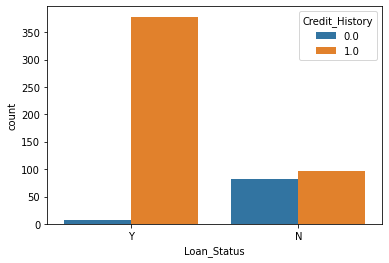

In [19]:
sns.countplot(data['Loan_Status'],hue=data['Credit_History'])

In [20]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [ ]:
print('The percentage of credit history yes : %.2f' % (data['Credit_History'].value_counts()[1] / len(data)))
print('The percentage of credit history no : %.2f' % (data['Credit_History'].value_counts()[0] / len(data)))

The percentage of credit history yes : 0.77
The percentage of credit history no : 0.14


In [ ]:
#Deal with missing values by switching them to 1 as this is the most common value so most likely to be correct.
data['Credit_History'] = data['Credit_History'].fillna(1)
data.isnull().sum().sort_values(ascending = False)

In [ ]:
sns.countplot(data['Loan_Status'],hue=data['Self_Employed'])

In [ ]:
#Doesn't seem to affect the outcome so fill with no
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data.isnull().sum().sort_values(ascending = False)

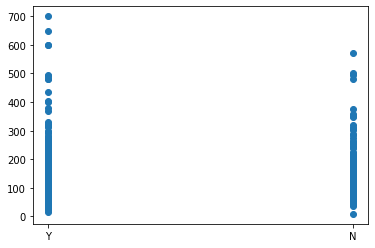

In [25]:
#Numerical data
plt.scatter(data['Loan_Status'], data['LoanAmount'])

In [ ]:
#Pattern similar so replace with mean.
data['LoanAmount'] = data['LoanAmount'].fillna( data['LoanAmount'].mean())
data.isnull().sum().sort_values(ascending = False)

In [27]:
#Drop all others.
data.dropna(inplace = True)
data.shape

(573, 13)

Q. Is there any correlation in the data? How would you decide which columns to keep?

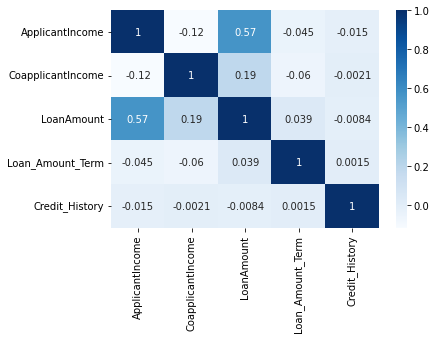

In [18]:
dataplot = sns.heatmap(data.corr(), cmap="Blues", annot=True) #Doesn't seem to be significant correlations

Q. Is there any imbalance in the label
?

In [21]:
data['Loan_Status'].value_counts() #Not very well balanced but sufficient as above the 1/4 threshold.

Y    422
N    192
Name: Loan_Status, dtype: int64

Q. Are there any outliers in the dataset? What do you do with them?

{'boxes': [<matplotlib.lines.Line2D at 0x7f19fc38be50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f19fc392ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f19fc397f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f19fc3979d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f19fc3e8b50>,
  <matplotlib.lines.Line2D at 0x7f19fc392990>]}

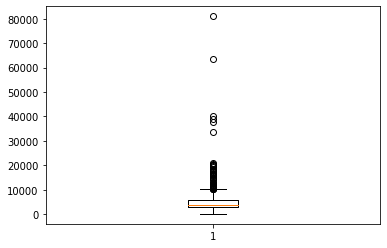

In [28]:
plt.boxplot(data['ApplicantIncome']) #2 outliers above 50000

In [29]:
outliers = data[data['ApplicantIncome'] > 50000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


{'boxes': [<matplotlib.lines.Line2D at 0x7f19fc309550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f19fc310610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f19fc319650>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f19fc319110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f19fc309b50>,
  <matplotlib.lines.Line2D at 0x7f19fc3100d0>]}

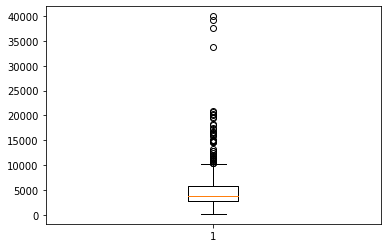

In [30]:
#Not both approved and only two rows so will remove
data = data[data['ApplicantIncome'] < 50000]
plt.boxplot(data['ApplicantIncome'])

In [31]:
#still a group above 25000
outliers = data[data['ApplicantIncome'] > 25000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [ ]:
#Most have been approved so will leave these outliers.

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [ ]:
#Drop ID column and make all columns numerical. 
data.drop('Loan_ID', axis=1, inplace=True)
data.info()

In [33]:
data['Loan_Status'] = np.where((data['Loan_Status'] == 'Y'), 1, 0)
data['Married'] = np.where((data['Married'] == 'Yes'), 1, 0)
data['Gender'] = np.where((data['Gender'] == 'Female'), 1, 0)
data['Education'] = np.where((data['Education'] == 'Graduate'), 1, 0)
data['Self_Employed'] = np.where((data['Self_Employed'] == 'Yes'), 1, 0)
data['Dependents'] = np.where((data['Dependents'] == '0'), 0, 1)

In [34]:
#want to keep 3 options for Property area
def f(row):
  if row['Property_Area'] == "Rural":
    val = 1
  elif row['Property_Area'] == "Urban":
    val = 0
  else:
    val = 2
  return val

data['Property_Area'] = data.apply(f, axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             571 non-null    int64  
 1   Married            571 non-null    int64  
 2   Dependents         571 non-null    int64  
 3   Education          571 non-null    int64  
 4   Self_Employed      571 non-null    int64  
 5   ApplicantIncome    571 non-null    int64  
 6   CoapplicantIncome  571 non-null    float64
 7   LoanAmount         571 non-null    float64
 8   Loan_Amount_Term   571 non-null    float64
 9   Credit_History     571 non-null    float64
 10  Property_Area      571 non-null    int64  
 11  Loan_Status        571 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 58.0 KB


Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [36]:
x = data.iloc[:,0:11]  
y = data.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y,
                             test_size=0.2, random_state=42)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

ntree1, ntree2 = 50,100
from sklearn.metrics import accuracy_score
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(predictions, ytest))

0.7565217391304347
0.7739130434782608
0.8
0.6260869565217392
0.5826086956521739
0.3130434782608696


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [39]:
#Decision Tree Classifier had highest accuracy result.
from sklearn.tree import DecisionTreeClassifier
final_model = DecisionTreeClassifier()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(accuracy_score(p, ytest))

0.6521739130434783


In [40]:
from joblib import dump
dump(final_model, 'Loan_Status2.pkl', compress=9)

['Loan_Status2.pkl']

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [45]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {"Loan_ID": "LP001002"
}

body = str.encode(json.dumps(data))

url = 'http://f6d637cf-5d32-40d8-b929-18aa501bdd5f.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

The request failed with status code: 400
Content-Length: 66
Content-Type: application/json
Date: Fri, 18 Mar 2022 12:44:26 GMT
Server: nginx/1.14.0 (Ubuntu)
X-Ms-Request-Id: 5706577b-e616-4451-8e2f-5ed5e89728b5
X-Ms-Run-Fn-Exec-Ms: 0.348
X-Ms-Run-Function-Failed: False
Connection: close


{"status_code": 400, "message": "Missing parameter in body: data"}
